In [348]:
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!pip install .
!python setup.py install
%cd ..

fatal: destination path 'fastText' already exists and is not an empty directory.
/Users/alitaylanakyurek/Downloads/Assigment_1/fastText
Processing /Users/alitaylanakyurek/Downloads/Assigment_1/fastText
  Preparing metadata (setup.py) ... done
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-macosx_10_16_x86_64.whl size=353716 sha256=e5c1f8611edd28a32c84ae54367a712b23c7c275d82878a29faa911fed32a475
  Stored in directory: /private/var/folders/84/xkfrxtbd2hsbzdg1twbdsq340000gn/T/pip-ephem-wheel-cache-bxu4q6fw/wheels/ee/07/01/3fd810fc38316f3132f4095687872e0a36026c7e64d27dfa30
Successfully built fasttext
  Attempting uninstall: fasttext
    Found existing installation: fasttext 0.9.2
    Uninstalling fasttext-0.9.2:
      Successfully uninstalled fasttext-0.9.2
/Users/alitaylanakyurek/anaconda3/envs/olartik/lib/python3.8/site-packages/setuptools/dist.py:770: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the undersc

/Users/alitaylanakyurek/Downloads/Assigment_1


In [1]:
# Test if installation was successful
import fasttext

In [4]:
!git clone https://github.com/hghodrati/wikifil.git

Cloning into 'wikifil'...
remote: Enumerating objects: 12, done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 12
Receiving objects: 100% (12/12), done.
Resolving deltas: 100% (1/1), done.


In [7]:
# preprocess xml and save to new file
!perl wikifil/wikifil.pl dataset/trwiki-20230401-pages-articles-multistream.xml > dataset/data_embed

In [2]:
# Visualize data
!head -c 80 dataset/data_embed


 one one six two do um yeri onon nehri d l n boldak mo olistan l m tarihi l m y

In [2]:
%mkdir results
CBOW_EMBED = "results/embed_cbow.bin"
SKIPGRAM_EMBED = "results/embed_skipgram.bin"

mkdir: results: File exists


In [ ]:
import fasttext

EMBEDDING_DIM = 100
# Train the CBOW model
embed_model_cbow = fasttext.train_unsupervised('dataset/data_embed', model='cbow')
embed_model_cbow.save_model(CBOW_EMBED)
embed_model_cbow = fasttext.load_model(CBOW_EMBED)


Read 247M words
Number of words:  443672
Number of labels: 0
Progress:   0.8% words/sec/thread:  150013 lr:  0.049624 avg.loss:  1.940438 ETA:   0h45m29s

In [3]:
embed_model_cbow = fasttext.load_model(CBOW_EMBED)

In [17]:
print(embed_model_cbow.words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
print(embed_model_cbow['kral']) 

[-2.294296   -1.880908    3.866084   -0.53450984 -0.746529    1.2178588
 -1.508628    5.126393    4.724427    1.326548   -3.1210868  -0.05586785
  3.1144812   2.345092   -3.872583   -3.8402267  -1.4458805  -2.4879267
 -5.706722    0.3979774  -0.01078974 -0.19841765 -3.4739966   0.12982167
 -2.3909354  -0.27577567 -0.78161     1.8083713  -3.041014   -2.7527332
 -1.3530577   1.8920608  -2.2907948  -1.4107292  -0.8124462  -2.4625294
  1.0520375   5.3012066  -1.5035663   0.15662003 -0.25623044 -3.2469213
 -2.0428581   1.5839351   1.4489285   3.18555     3.4286888  -0.6306196
 -0.43345064  0.17236225 -0.80951196  1.8966606   3.1868393   1.1018137
  3.5887115   2.4989686   0.02336156 -2.594473    2.9108121  -0.07575616
  1.1116657   3.7941074   5.2764163   0.99557275 -0.3277472   1.095738
  4.4159336  -0.38141736 -3.6937728   1.02839     2.1005235  -3.070873
 -3.3441906  -0.23965181  0.59716076 -1.195617    0.7714918   2.3524938
 -2.861599   -3.3698997  -0.88416934  2.0075004  -2.7597904  -0

In [8]:
word = ""

In [6]:
embed_model_cbow.get_nearest_neighbors(word)

[(0.0, 'two'),
 (0.0, 'nine'),
 (0.0, 'three'),
 (0.0, 'r'),
 (0.0, 've'),
 (0.0, 'four'),
 (0.0, 'dojosunu'),
 (0.0, 'sithtmdetails'),
 (0.0, 'havayolar'),
 (0.0, 'tutanaklarda')]

In [33]:
embed_model_skipgram = fasttext.train_unsupervised('dataset/data_embed', model='skipgram')
embed_model_skipgram.save_model(SKIPGRAM_EMBED)
embed_model_skipgram = fasttext.load_model(SKIPGRAM_EMBED)


Read 247M words
Number of words:  443672
Number of labels: 0
Progress: 100.0% words/sec/thread:   74852 lr:  0.000000 avg.loss:  0.123364 ETA:   0h 0m 0s  0.0% words/sec/thread:   67176 lr:  0.049988 avg.loss:  2.561009 ETA:   1h42m20s  4.0% words/sec/thread:   77278 lr:  0.047992 avg.loss:  1.165188 ETA:   1h25m25s  4.4% words/sec/thread:   77169 lr:  0.047798 avg.loss:  1.151303 ETA:   1h25m11s  6.6% words/sec/thread:   79455 lr:  0.046708 avg.loss:  0.937080 ETA:   1h20m51s 12.9% words/sec/thread:   81644 lr:  0.043557 avg.loss:  0.662723 ETA:   1h13m22s 13.8% words/sec/thread:   81735 lr:  0.043113 avg.loss:  0.644022 ETA:   1h12m32s 19.1% words/sec/thread:   82194 lr:  0.040473 avg.loss:  0.571332 ETA:   1h 7m43s 21.3% words/sec/thread:   82403 lr:  0.039348 avg.loss:  0.516128 ETA:   1h 5m40s 21.7% words/sec/thread:   82341 lr:  0.039163 avg.loss:  0.507160 ETA:   1h 5m25s 22.4% words/sec/thread:   82356 lr:  0.038788 avg.loss:  0.490504 ETA:   1h 4m46s 37.4% words/sec/thread:   

In [4]:
embed_model_skipgram = fasttext.load_model(SKIPGRAM_EMBED)

In [9]:
print(embed_model_skipgram['kral']) 

[-0.14061163  0.21152861  0.37297234  0.17459579 -0.06302437 -0.23896378
 -0.0406476   0.48994002  0.85156524  0.24002695  0.17524059  0.27344623
  0.28669873 -0.20847699  0.24135225 -0.52514803  0.16876692  0.05644416
 -0.7636112   0.57508785 -0.1068361  -0.51401365  0.28645584  0.04247218
 -0.23114674  0.05552669  0.53369427  0.6509493  -0.43459892 -0.22358531
 -0.00744076  0.33292818 -0.0874656   0.09704663  0.02884606 -0.5719166
  0.09101292  0.2132607   0.3231337  -0.07480907  0.0565987   0.25604635
  0.5738702   0.24749093  0.47816133  0.512537    0.7872196   0.45064402
 -0.05651958  0.6161764   0.16024846  0.52799463  0.28019077  0.85644996
  0.56254166 -0.27865806  0.35512173 -0.15564233  0.12851554 -0.04819189
  0.49310368  0.56622326 -0.30021083 -0.26640487  0.88466156 -0.04250515
 -0.12148838  0.28936973 -0.2367553   0.07663409 -0.54772973  0.0713184
  0.27757034 -0.89804256  0.15931012  0.34308848  0.30547467 -0.09906186
  0.21058516 -0.29232493  0.0034294   0.4890303  -0.2

In [10]:
embed_model_skipgram.get_nearest_neighbors(word)

[(0.0, 'two'),
 (0.0, 'nine'),
 (0.0, 'three'),
 (0.0, 'r'),
 (0.0, 've'),
 (0.0, 'four'),
 (0.0, 'dojosunu'),
 (0.0, 'sithtmdetails'),
 (0.0, 'havayolar'),
 (0.0, 'tutanaklarda')]

In [11]:
embed_model_skipgram.get_analogies("iphone", "apple", "galaxy")

[(0.7531418204307556, 'samsung'),
 (0.7077250480651855, 'redmi'),
 (0.6996424198150635, 'axy'),
 (0.6976189613342285, 'xperia'),
 (0.6925432682037354, 'duos'),
 (0.6889880895614624, 'phablet'),
 (0.6831598877906799, 'touchwiz'),
 (0.6829336285591125, 'meizu'),
 (0.6817553043365479, 'telefoto'),
 (0.6693254113197327, 'galax')]

In [12]:
#### Inline Question 2: Find an example of an analogy that holds, using the `get_analogies` function. Explain the analogy and also how the analogies are calculated.

print("Your answer:Anology I find was: iphone, apple, galaxy  and it outputted samsung which is reasonable. I am not %100 sure about how they are calculated but it probably compares first two word's embeddings, then based on in which way they are correlated, projects third word vector into that dimension and finds closest (in terms of cosine similarity) word embedding vector in that dimension.")


Your answer:Anology I find was: iphone, apple, galaxy  and it outputted samsung which is reasonable. I am not %100 sure about how they are calculated but it probably compares first two word's embeddings, then based on in which way they are correlated, projects third word vector into that dimension and finds closest (in terms of cosine similarity) word embedding vector in that dimension.


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from typing import List, Tuple, Dict
import numpy as np
import random
from torch.nn.utils.rnn import pad_sequence
import time
from tqdm import tqdm
from matplotlib import pyplot as plt
import random
from collections import Counter

In [14]:
#Set the seeds for reproducibility
SEED = 542

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [15]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

print(torch.cuda.is_available())

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print('using device:', device)

False
using device: cpu


In [16]:
def parse_file(file_path):
    """
    Parses a file in the Universal Dependencies (UD) annotation style and returns a list of all the sentences in the file.
    Note: The data files you need in this part of the assignemnt are stored under the dataset/ directory. You can open the
    files to have a better understanding of the format. If you want to learn more about the POS tags, you can visit the
    Universal Dependencies website: https://universaldependencies.org/tr/pos/index.html

    The output should be a list of tuples, where each tuple represents a sentence and contains (word, POS tag) pairs for each
    word in the sentence. For example, the following sentence:

    "The quick brown fox jumps over the lazy dog."
    should be represented as:
    [("The", "DET"), ("quick", "ADJ"), ("brown", "ADJ"), ("fox", "NOUN"), ("jumps", "VERB"), ("over", "ADP"), ("the", "DET"), ("lazy", "ADJ"), ("dog", "NOUN"), (".", "PUNCT")]
    
    Args:
    file_path (str): The path to the file to be parsed.
    
    Returns:
    list: A list of tuples, where each tuple represents a sentence and contains (word, POS tag) pairs for each word in the sentence.
    """
    # *****START OF YOUR CODE*****
    sentences = []
    sentence = []

    with open(file_path, "r") as f:
        for line in f:
            line = line.strip()
            if line.startswith("#"):
                continue
            
            elif not line:
                if sentence:
                    sentences.append(sentence)
                    sentence = []
            else:
                columns = line.split("\t")
                word, pos_tag = columns[1], columns[3]
                sentence.append((word, pos_tag))

    if sentence:
        sentences.append(sentence)

    return sentences

    
    

    # *****END OF YOUR CODE*****


In [17]:
posTags = parse_file("dataset/train.conllu")
posTags[1]

[('Adeta', 'ADV'),
 ('kendimden', 'PRON'),
 ('geçmiş', 'VERB'),
 ('bir', 'DET'),
 ('haldeyim', '_'),
 ('halde', 'NOUN'),
 ('yim', 'AUX'),
 ('.', 'PUNCT')]

In [18]:
print(posTags[1][1])
len(posTags)

('kendimden', 'PRON')


7803

In [19]:
def build_vocab(data: List[List[Tuple[str, str]]]) -> Tuple[Dict[str, int], Dict[str, int]]:
    """
    Builds a vocabulary of words and part-of-speech (POS) tags based on the input data. Don't forget to add special tokens (e.g. <PAD>, <UNK>, etc.)

    Args:
    data (List[List[Tuple[str, str]]]): A list of sentences, where each sentence is represented as a list of (word, POS tag) tuples.

    Returns:
    Tuple[Dict[str, int], Dict[str, int]]: A tuple containing two dictionaries. The first dictionary maps words to their index in the vocabulary, and the second dictionary maps POS tags to their index in the vocabulary.
    """  
    # *****START OF YOUR CODE*****
 
    Dict1 = {}
    Dict2 = {}
    Dict1["<PAD>"] = 0
    Dict1["<UNK>"] = 1
    Dict2["<PAD>"] = 0
    Dict2["<UNK>"] = 1
    currentIndexWord = 2

    currentIndexPos = 2

    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j][0] not in Dict1.keys():
                Dict1[data[i][j][0]] = currentIndexWord
                currentIndexWord += 1
                currentPos = '<' + data[i][j][1] + '>'

                if currentPos not in Dict2.keys():
                        Dict2['<' + data[i][j][1] + '>'] = currentIndexPos
                        currentIndexPos += 1


                    
    return (Dict1, Dict2)
    
    # *****END OF YOUR CODE*****

In [20]:
a = []
data = posTags
a = build_vocab(data)
wordDict = a[0]
posDict = a[1]

In [21]:
print(wordDict)


{'<PAD>': 0, '<UNK>': 1, '1936': 2, 'yılındayız': 3, 'yılında': 4, 'yız': 5, '.': 6, 'Adeta': 7, 'kendimden': 8, 'geçmiş': 9, 'bir': 10, 'haldeyim': 11, 'halde': 12, 'yim': 13, 'O': 14, 'nasıl': 15, 'derse': 16, 'desin': 17, 'uğraştığı': 18, 'sanatın': 19, 'kendisine': 20, 'emanet': 21, 'olduğunu': 22, 'söyleyen': 23, 'üstadları': 24, 'vardı': 25, 'var': 26, 'dı': 27, 'Ahmed': 28, 'Rasim': 29, ',': 30, "Büyükada'ya": 31, 'gidip': 32, 'birkaç': 33, 'gün': 34, 'kalmayı': 35, 'tasarlamıştı': 36, 'tasarlamış': 37, 'tı': 38, 'Rüzgâr': 39, 'yine': 40, 'güçlü': 41, 'esiyordu': 42, 'esiyor': 43, 'du': 44, 'Öte': 45, 'yandan': 46, 'Sarı': 47, '-': 48, 'Lacivertliler': 49, 'yarın': 50, 'Samandıra': 51, "Tesisleri'nde": 52, 'Türk': 53, 'Telekom': 54, 'Lig': 55, 'A': 56, 'takımlarından': 57, "Kocaelispor'la": 58, 'saat': 59, "19.30'da": 60, 'hazırlık': 61, 'maçı': 62, 'yapacak': 63, 'Peki': 64, 'kim': 65, 'bu': 66, 'küçük': 67, 've': 68, 'basit': 69, 'sebepleri': 70, 'devleştirerek': 71, 'aramıza'

In [22]:
print(posTags[0:100])

[[('1936', 'NUM'), ('yılındayız', '_'), ('yılında', 'NOUN'), ('yız', 'AUX'), ('.', 'PUNCT')], [('Adeta', 'ADV'), ('kendimden', 'PRON'), ('geçmiş', 'VERB'), ('bir', 'DET'), ('haldeyim', '_'), ('halde', 'NOUN'), ('yim', 'AUX'), ('.', 'PUNCT')], [('O', 'PRON'), ('nasıl', 'ADV'), ('derse', 'VERB'), ('desin', 'VERB'), ('uğraştığı', 'VERB'), ('sanatın', 'NOUN'), ('kendisine', 'PRON'), ('emanet', 'NOUN'), ('olduğunu', 'VERB'), ('söyleyen', 'VERB'), ('üstadları', 'NOUN'), ('vardı', '_'), ('var', 'NOUN'), ('dı', 'AUX'), ('.', 'PUNCT')], [('Ahmed', 'PROPN'), ('Rasim', 'PROPN'), (',', 'PUNCT'), ("Büyükada'ya", 'PROPN'), ('gidip', 'VERB'), ('birkaç', 'DET'), ('gün', 'NOUN'), ('kalmayı', 'VERB'), ('tasarlamıştı', '_'), ('tasarlamış', 'VERB'), ('tı', 'AUX'), ('.', 'PUNCT')], [('Rüzgâr', 'NOUN'), ('yine', 'ADV'), ('güçlü', 'ADV'), ('esiyordu', '_'), ('esiyor', 'VERB'), ('du', 'AUX'), ('.', 'PUNCT')], [('Öte', 'NOUN'), ('yandan', 'NOUN'), ('Sarı', 'ADJ'), ('-', 'PUNCT'), ('Lacivertliler', 'NOUN'), (',

In [23]:
print(posDict)

{'<PAD>': 0, '<UNK>': 1, '<NUM>': 2, '<_>': 3, '<NOUN>': 4, '<AUX>': 5, '<PUNCT>': 6, '<ADV>': 7, '<PRON>': 8, '<VERB>': 9, '<DET>': 10, '<PROPN>': 11, '<ADJ>': 12, '<CCONJ>': 13, '<ADP>': 14, '<PART>': 15, '<SCONJ>': 16, '<INTJ>': 17, '<X>': 18}


In [24]:
# Parse the training and validation data files using the `parse_file` function
training_data = parse_file("./dataset/train.conllu")
validation_data = parse_file("./dataset/val.conllu")


# Build the vocabulary for the training data using the `build_vocab` function
# The `build_vocab` function returns two dictionaries:
#   - `word_to_idx`: maps words to their index in the vocabulary
#   - `pos_to_idx`: maps POS tags to their index in the vocabulary
word_to_idx, pos_to_idx = build_vocab(training_data)

In [25]:
#Helper functions to convert between indices and human-readable format. You don't need to do anything here.
#Just reading and making sure you understand what's going on is enough.

idx_to_word = {idx: word for word, idx in word_to_idx.items()}
idx_to_pos = {idx: pos for pos, idx in pos_to_idx.items()}

def convert_idx_to_words(indices: torch.tensor) -> str:
    """Converts a sequence of word indices to a human-readable format.
    
    Args:
        indices (torch.tensor): A sequence of word indices.
    
    Returns:
        str: A string representation of the sequence of words.
    """
    return " ".join([idx_to_word[idx.item()] for idx in indices])

def convert_idx_to_pos(indices: torch.tensor) -> str:
    """Converts a sequence of POS tag indices to a human-readable format.
    
    Args:
        indices (torch.tensor): A sequence of POS tag indices.
    
    Returns:
        str: A string representation of the sequence of POS tags.
    """
    return " ".join([idx_to_pos[idx.item()] for idx in indices])

In [26]:
word_indices = torch.tensor([0, 1, 2, 3], dtype=torch.long)

convert_idx_to_words(word_indices)


'<PAD> <UNK> 1936 yılındayız'

In [27]:
convert_idx_to_pos(word_indices)

'<PAD> <UNK> <NUM> <_>'

In [28]:
# Helper function used for minibatching. You don't need to do anything here. Just reading and making sure you understand what's going on is enough.

def collate_batch(batch):
    """
    This function collates a batch of sentences into a padded tensor that can be processed by the model.

    Arguments:

    batch: a list of tuples where each tuple contains a sentence and its corresponding POS tags.
    Returns:

    A tuple of two padded tensors: one containing the text data and the other containing the POS tags.
    """
    
    tag_list, text_list = [], []
    for (line, label) in batch:
        text_list.append(line)
        tag_list.append(label)
        
    return (
        pad_sequence(text_list, padding_value=word_to_idx['<PAD>']).t(),
        pad_sequence(tag_list, padding_value=pos_to_idx['<PAD>']).t()
    )

#I havve transposed the outputs since old function do not store sentences in single tensors,
#sentence indexes are columns but it will be better to pass them as rows. Also accuracy goes from %93 to %99.5
#since storing sentences in single sensors allows to capture context of sentences better.


In [29]:

batch_data = [
    (torch.tensor([1, 2, 3, 4]), torch.tensor([1, 2, 1, 2])),  # (sentence, POS tags)
    (torch.tensor([5, 6, 7]), torch.tensor([3, 1, 2])),
    (torch.tensor([8, 9]), torch.tensor([1, 3]))
]

text_tensor, pos_tensor = collate_batch(batch_data)

In [30]:
pos_tensor

tensor([[1, 2, 1, 2],
        [3, 1, 2, 0],
        [1, 3, 0, 0]])

In [31]:
text_tensor

tensor([[1, 2, 3, 4],
        [5, 6, 7, 0],
        [8, 9, 0, 0]])

In [32]:
### Build Vocabulary

In [33]:
class POSDataset(Dataset):
    """
    A class representing a Part-Of-Speech (POS) tagging dataset, which inherits from PyTorch's Dataset class.
    You need to four methods for this class:
    - __init__: Initializes the dataset object.
    - __len__: Returns the number of sentences in the dataset.
    - __getitem__: Returns the i-th sentence in the dataset.
    - vocab_lookup: Converts a sentence represented as a list of word/POS-tag pairs (tuples) to a pair of PyTorch tensors 
                    representing the corresponding sequences of word and POS tag indices. Out of vocabulary words are
                    represented by the index of the "<UNK>" token.
    """

    def __init__(self, data: List[List[Tuple[str, str]]], word_to_idx: Dict, pos_to_idx: Dict):
        """
        Initializes a new POSDataset object.
        Args:
        - data: A list of sentences, where each sentence is a list of word/POS-tag pairs (tuples).
        - word_to_idx: A dictionary mapping words to their corresponding indices.
        - pos_to_idx: A dictionary mapping POS tags to their corresponding indices.
        """
        # *****START OF YOUR CODE*****
        
        self.data = data
        self.word_to_idx = word_to_idx
        self.pos_to_idx = pos_to_idx


        # *****END OF YOUR CODE*****

    def vocab_lookup(self, sentence: List[Tuple[str, str]]) -> Tuple[torch.tensor, torch.tensor]:
        """
        Converts a sentence represented as a list of word/POS-tag pairs (tuples) to a pair of PyTorch tensors
        representing the corresponding sequences of word and POS tag indices. Out of vocabulary words are
        represented by the index of the "<UNK>" token.

        Args:
        - sentence: A list of word/POS-tag pairs (tuples) representing a single sentence.

        Returns:
        A tuple containing two PyTorch tensors, the first representing the sequence of word indices in the sentence,
        and the second representing the sequence of POS tag indices in the sentence.
        """
        # *****START OF YOUR CODE*****
        
        
        wordIndices = torch.empty(len(sentence), dtype=torch.long)
        posIndices = torch.empty(len(sentence), dtype=torch.long)
        
        
        for i in range(len(sentence)):
            
            
            if sentence[i][0] in self.word_to_idx:
                wordIndices[i] = self.word_to_idx[sentence[i][0]]
                posIndices[i] = self.pos_to_idx['<' + sentence[i][1] + '>']
            else:
                wordIndices[i] = self.word_to_idx["<UNK>"]
                posIndices[i] = self.pos_to_idx["<UNK>"]
        

        return wordIndices, posIndices
    
        # *****END OF YOUR CODE*****

    
    def __len__(self):
        """
        Returns the number of sentences in the dataset.
        """
        # *****START OF YOUR CODE*****
        
        return len(self.data)
        # *****END OF YOUR CODE*****

    def __getitem__(self, idx: int) -> Tuple[torch.tensor, torch.tensor]:
        """
        Returns a single sentence from the dataset as a pair of PyTorch tensors representing the corresponding
        sequences of word and POS tag indices.

        Args:
        - idx: The index of the sentence to retrieve.

        Returns:
        A tuple containing two PyTorch tensors, the first representing the sequence of word indices in the sentence,
        and the second representing the sequence of POS tag indices in the sentence.
        """
        # *****START OF YOUR CODE*****
        
        return self.vocab_lookup(self.data[idx])

        # *****END OF YOUR CODE*****

In [34]:
posDS = POSDataset(posTags ,word_to_idx, pos_to_idx)

print(posDS.pos_to_idx)

{'<PAD>': 0, '<UNK>': 1, '<NUM>': 2, '<_>': 3, '<NOUN>': 4, '<AUX>': 5, '<PUNCT>': 6, '<ADV>': 7, '<PRON>': 8, '<VERB>': 9, '<DET>': 10, '<PROPN>': 11, '<ADJ>': 12, '<CCONJ>': 13, '<ADP>': 14, '<PART>': 15, '<SCONJ>': 16, '<INTJ>': 17, '<X>': 18}


In [35]:
posDS.__getitem__(2)

(tensor([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,  6]),
 tensor([8, 7, 9, 9, 9, 4, 8, 4, 9, 9, 4, 3, 4, 5, 6]))

In [36]:
BATCH_SIZE = 32 

In [37]:
# This part is preparing the training and validation datasets by creating POSDataset objects 
# using training_data and validation_data. The word_to_idx and pos_to_idx dictionaries created in build_vocab 
# are passed to POSDataset so that each sentence in the datasets can be converted to a tensor of word and POS tag indices.
# Then, DataLoader objects are created for both the training and validation datasets, with BATCH_SIZE batches per iteration. 
# shuffle=True is used to shuffle the order of samples in each batch, which helps to prevent the model from overfitting to the order of the data. 
# collate_batch is used as the function to merge samples into batches, as it pads sequences to the same length and 
# returns two tensors, one for the word indices and one for the POS tag indices.
# This code block is essential to prepare the data for training the model. 
# The training and validation dataloaders can be used in the training loop to iterate over the dataset in batches.

rawTrainData = parse_file("dataset/train.conllu")
rawValidationData = parse_file("dataset/val.conllu")

training_dataset = [[0 for i in range(len(rawTrainData))] for j in range(len(rawTrainData))]
validation_dataset = [[0 for i in range(len(rawValidationData))] for j in range(len(rawValidationData))]


for i in range(len(rawTrainData)):
    training_dataset[i] = posDS.__getitem__(i)

for i in range(len(rawValidationData)):
    validation_dataset[i] = posDS.__getitem__(i)


training_dataloader = DataLoader(training_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle=True)




In [38]:
# It is always usefull to see dataset statistics to get a better understanding of the data.
print(f"Unique tokens in word vocabulary: {len(word_to_idx)}")
print(f"Unique tokens in tag vocabulary: {len(pos_to_idx)}")
print()
print(f"Number of training examples: {len(training_dataset)}")
print(f"Number of validation examples: {len(validation_dataset)}")

Unique tokens in word vocabulary: 33488
Unique tokens in tag vocabulary: 19

Number of training examples: 7803
Number of validation examples: 979


In [39]:
training_dataset[4][0]

tensor([39, 40, 41, 42, 43, 44,  6])

In [40]:
# Check a random sample from the training dataset to see if the data is correctly loaded.
print("Sample from the dataset:", training_dataset[4])
print()
print("Human-readable version:", convert_idx_to_words(training_dataset[4][0]), convert_idx_to_pos(training_dataset[4][1]))

Sample from the dataset: (tensor([39, 40, 41, 42, 43, 44,  6]), tensor([4, 7, 7, 3, 9, 5, 6]))

Human-readable version: Rüzgâr yine güçlü esiyordu esiyor du . <NOUN> <ADV> <ADV> <_> <VERB> <AUX> <PUNCT>


In [41]:
collate_batch(training_dataset[0:8])[0]

tensor([[ 2,  3,  4,  5,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 7,  8,  9, 10, 11, 12, 13,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,  6,  0,  0,  0,
          0,  0,  0,  0],
        [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,  6,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [39, 40, 41, 42, 43, 44,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [45, 46, 47, 48, 49, 30, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 10,
         61, 62, 63,  6],
        [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [76, 77, 78, 79, 80, 81,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0]])

In [42]:
import torch.nn.functional as F

class BiLSTMPOSTagger(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx):
        """
        BiLSTM model for POS tagging.
        Check this link for more details: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

        Args:
            input_dim (int): Number of unique words in the vocabulary.
            embedding_dim (int): Dimension of the word embeddings.
            hidden_dim (int): Dimension of the LSTM hidden states.
            output_dim (int): Number of unique POS tags.
            n_layers (int): Number of LSTM layers.
            bidirectional (bool): Whether to use a bidirectional LSTM.
            dropout (float): Probability of dropout, if any.
            pad_idx (int): Index of the <PAD> token in the vocabulary.
            embed_model (fasttext.FastText._FastText): FastText embedding model
        """
        super().__init__()
        
        # *****START OF YOUR CODE*****

        self.embedding_dim = embedding_dim
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.output_dim = output_dim
        
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)
        self.output_layer = nn.Linear(hidden_dim * (2 if bidirectional else 1), output_dim)
        self.dropout = nn.Dropout(dropout)
        
        # *****END OF YOUR CODE*****

    def forward(self, text):
        """
        Perform forward pass through the model.

        Args:
            text (Tensor): Input text of shape [batch size, sent len].

        Returns:
            Tensor: Predictions of shape [batch size, sent len, output dim].
        """
        # *****START OF YOUR CODE*****
        
        if len(text.shape) == 1:
            text = text.unsqueeze(0)

        
        
        embedded = self.embedding(text)

        embedded = self.dropout(embedded)

        embedded = embedded.permute(1, 0, 2)  # Shape: [sent len, batch size, embedding dim]

        lstm_out, _ = self.lstm(embedded)

        lstm_out = self.dropout(lstm_out)

        lstm_out = lstm_out.permute(1, 0, 2)

        predictions = self.output_layer(lstm_out)

    

        return predictions

        # *****END OF YOUR CODE*****



In [43]:
#collate_batch(training_dataset[0:8])[0]

In [44]:
posTaggerLstm  = BiLSTMPOSTagger(len(word_to_idx), 50, 50, len(pos_to_idx), 1, False, 0, pos_to_idx['<PAD>'])

#def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx, embed_model):


In [45]:
#posTaggerLstm.forward(collate_batch(training_dataset[0:8])[0])

In [46]:
#posTaggerLstm.forward(training_dataset[5][0])

In [47]:
# initialize the model
model = posTaggerLstm

In [48]:
# See the output of the model for a random sample from the training dataset.
# It is wrapped in torch.no_grad() because we are not training the model.
with torch.no_grad():
    inputs = training_dataset[1][0]
    tag_scores = model(inputs)
    print(tag_scores)

tensor([[[-4.2129e-02,  1.0989e-01,  1.8281e-02, -5.7311e-02,  1.2267e-01,
           9.3718e-02,  5.5838e-02, -3.4160e-02,  7.7673e-02,  1.1884e-02,
           1.6854e-01, -4.3238e-02,  6.2788e-02, -9.8674e-02, -1.3750e-01,
           1.1036e-02, -4.7391e-02,  1.7808e-02,  1.1277e-04],
         [-6.3688e-02,  4.1358e-02,  6.6684e-02, -1.3199e-01,  1.9956e-01,
           8.4090e-02,  7.9731e-02, -5.8043e-02,  1.1977e-01, -7.1021e-02,
           1.9334e-01, -4.2557e-02,  4.0058e-02, -6.1211e-02, -8.1300e-02,
          -2.8200e-02, -5.8278e-02,  1.2436e-01,  1.0911e-02],
         [-1.1930e-02,  1.3219e-01,  2.2362e-02, -5.0677e-02,  2.7502e-01,
           2.3505e-01,  1.6743e-01,  5.0217e-02,  1.3256e-01, -2.8351e-02,
           2.1266e-01,  2.7879e-02,  2.9687e-02, -1.1512e-01, -1.6101e-01,
          -7.6815e-02, -3.4698e-02,  9.5025e-02, -6.1736e-02],
         [-3.4344e-02,  4.7601e-02,  5.6045e-02, -1.0110e-01,  2.3332e-01,
           1.9335e-01,  1.3995e-01,  8.0567e-02,  1.1499e-01,

In [49]:
training_dataset[1][1]

tensor([ 7,  8,  9, 10,  3,  4,  5,  6])

In [50]:
#Define hyperparameters

NUM_OF_EPOCHS = 10
LEARNING_RATE = 0.01

In [51]:
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

criterion = nn.CrossEntropyLoss(ignore_index=pos_to_idx['<PAD>']) #Modify this part if you are using a different padding token.
criterion = criterion.to(device)

In [52]:
def train_for_single_epoch(model, iterator, optimizer, criterion, device):
    """
    Trains the model for one epoch on the given iterator with the specified optimizer and criterion.

    Args:
        model: The neural network model to train.
        iterator: The iterator over the training dataset.
        optimizer: The optimizer to use for gradient descent.
        criterion: The loss function to use.
        tag_pad_idx: The index of the padding token in the tag vocabulary.
        tag_unk_idx: The index of the unknown token in the tag vocabulary.

    Returns:
        The average loss and accuracy for the epoch.
    """
    # *****START OF YOUR CODE*****
    
    model.train()
    epoch_loss = 0
    epoch_acc = 0

    for text, tags in iterator:
        text = text.to(device)
        tags = tags.to(device)

        optimizer.zero_grad()

        predictions = model(text)
        reshaped_preds = predictions.view(-1, predictions.shape[-1])
        reshaped_tags = tags.reshape(-1)

        mask = (reshaped_tags != pos_to_idx['<PAD>'])
        loss = criterion(reshaped_preds[mask], reshaped_tags[mask])

        acc = categorical_accuracy(predictions, tags, pos_to_idx['<PAD>'])

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

    # *****END OF YOUR CODE*****

In [53]:
def categorical_accuracy(preds, y, tag_pad_idx):
    """
    Returns the categorical accuracy between predictions and the ground truth, ignoring pad tokens.
    """
    # *****START OF YOUR CODE*****
    
    max_preds = preds.argmax(dim=-1)
    non_pad_elements = (y != tag_pad_idx).nonzero(as_tuple=True)
    
    correct_preds = max_preds[non_pad_elements]
    correct_tags = y[non_pad_elements]
    
    correct = correct_preds.eq(correct_tags).sum()
    total = len(correct_tags)

    return correct.float() / total

    # *****END OF YOUR CODE*****

In [54]:
def evaluate(model, iterator, tag_pad_idx):
    """
    Evaluate the performance of a BiLSTMPOSTagger model on a given dataset iterator. Use the categorical_accuracy function
    you implemented above to calculate the accuracy on a batch of predictions.

    Args:
    - model: a BiLSTMPOSTagger object.
    - iterator: a DataLoader object containing (text, tags) tuples.
    - tag_pad_idx: an integer representing the index of the padding token in the tag vocabulary.

    Returns:
    - A float representing the categorical accuracy of the model on the given dataset iterator.

    """
    # *****START OF YOUR CODE*****
    
    if hasattr(model, 'eval'):
        model.eval()
    
    epoch_loss = 0
    epoch_acc = 0

    with torch.no_grad():
        for text, tags in iterator:
            text = text.to(device)
            tags = tags.to(device)

            predictions = model(text)
            acc = categorical_accuracy(predictions, tags, tag_pad_idx)

            epoch_acc += acc.item()

    return epoch_acc / len(iterator)

    # *****END OF YOUR CODE*****

In [55]:
# Check the models accuracy without training
accuracy = evaluate(model, validation_dataloader, tag_pad_idx=pos_to_idx['<PAD>'])
print(f'Accuracy before training: {accuracy*100:.2f}%')

Accuracy before training: 10.46%


In [56]:
import torch.nn.functional as F

def random_model(text):
    with torch.no_grad():
        # Get the input tensor shape
        input_shape = model(text).shape
        # Create the logits tensor with the same shape
        logits = torch.zeros(*input_shape, dtype=torch.float32, device=text.device)
        # Create random predictions
        random_preds = torch.randint(len(pos_to_idx), input_shape[:-1], device=text.device)
        logits.scatter_(2, random_preds.unsqueeze(2), 1)
        
    return logits

random_accuracy = evaluate(random_model, validation_dataloader, tag_pad_idx=pos_to_idx['<PAD>'])
print(f'Accuracy of random predictions: {random_accuracy*100:.2f}%')

from collections import Counter

tag_counter = Counter()
for _, tags in training_dataloader:
    tag_counter.update(tags.reshape(-1).tolist())

del tag_counter[pos_to_idx['<PAD>']]

most_frequent_tag = tag_counter.most_common(1)[0][0]
print(f"Most frequent tag: {most_frequent_tag}")

epoch_correct = epoch_n_label = 0

for text, tags in validation_dataloader:
    text = text.to(device)
    tags = tags.to(device)

    most_frequent_preds = torch.full_like(tags, fill_value=most_frequent_tag)

    mask = (tags != pos_to_idx['<PAD>'])
    correct = most_frequent_preds.eq(tags).masked_select(mask).sum().item()
    n_label = mask.sum().item()

    epoch_correct += correct
    epoch_n_label += n_label

most_frequent_accuracy = epoch_correct / epoch_n_label
print(f'Accuracy of predicting the most frequent class: {most_frequent_accuracy*100:.2f}%')


Accuracy of random predictions: 5.73%
Most frequent tag: 4
Accuracy of predicting the most frequent class: 30.71%


In [57]:
#Define hyperparameters

NUM_OF_EPOCHS = 10
LEARNING_RATE = 0.01

In [58]:
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

criterion = nn.CrossEntropyLoss(ignore_index=pos_to_idx['<PAD>']) #Modify this part if you are using a different padding token.
criterion = criterion.to(device)

In [59]:
loss_history = []
accuracy_history = []

for x in range(NUM_OF_EPOCHS):
    # Call the train_for_single_epoch function and store the result in the training_loss variable.
    # Call the evaluate function and store the result in the validation_accuracy variable.
    # Print out the current epoch number, training loss, and validation accuracy using the print function and formatted string syntax. 
    # Apend the training_loss and validation_accuracy values to their respective history lists (loss_history and accuracy_history).
    # *****START OF YOUR CODE*****
    training_loss, training_accuracy = train_for_single_epoch(model, training_dataloader, optimizer, criterion, device)
    validation_accuracy = evaluate(model, validation_dataloader, pos_to_idx['<PAD>'])
    
    print(f'Epoch: {x+1:02} | Training Loss: {training_loss:.3f} | Training Acc: {training_accuracy*100:.2f}% | Validation Acc: {validation_accuracy*100:.2f}%')
    
    loss_history.append(training_loss)
    accuracy_history.append(validation_accuracy)
    

    # *****END OF YOUR CODE*****
    
# Accuracy increses dramatically even after first training.
#I think this is related to most words have a few (most of them is porbably 1) possible pos tag, so in the first iteeration model lerns themm, then it starts to learn contextual ones


Epoch: 01 | Training Loss: 1.171 | Training Acc: 62.77% | Validation Acc: 77.82%
Epoch: 02 | Training Loss: 0.615 | Training Acc: 80.72% | Validation Acc: 88.31%
Epoch: 03 | Training Loss: 0.331 | Training Acc: 89.99% | Validation Acc: 94.52%
Epoch: 04 | Training Loss: 0.185 | Training Acc: 94.33% | Validation Acc: 96.28%
Epoch: 05 | Training Loss: 0.119 | Training Acc: 96.20% | Validation Acc: 97.69%
Epoch: 06 | Training Loss: 0.084 | Training Acc: 97.28% | Validation Acc: 98.12%
Epoch: 07 | Training Loss: 0.062 | Training Acc: 97.98% | Validation Acc: 98.77%
Epoch: 08 | Training Loss: 0.049 | Training Acc: 98.43% | Validation Acc: 98.95%
Epoch: 09 | Training Loss: 0.040 | Training Acc: 98.67% | Validation Acc: 99.12%
Epoch: 10 | Training Loss: 0.034 | Training Acc: 98.85% | Validation Acc: 99.33%


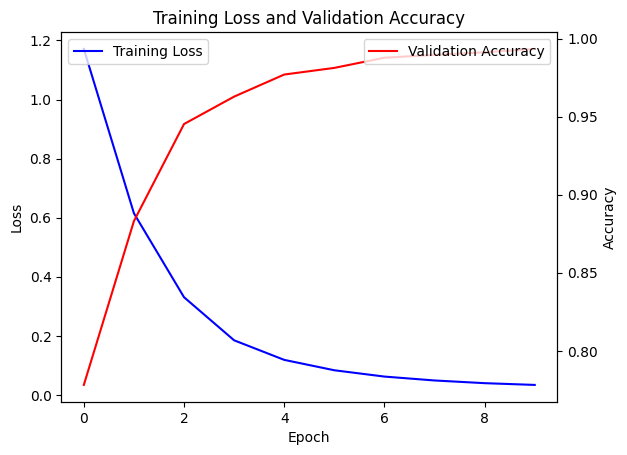

In [60]:
import matplotlib.pyplot as plt

# To plot the training metrics, use the matplotlib library.

# *****START OF YOUR CODE*****

fig, ax1 = plt.subplots()

ax1.plot(loss_history, label='Training Loss', color='blue')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.plot(accuracy_history, label='Validation Accuracy', color='red')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

plt.title('Training Loss and Validation Accuracy')
plt.show()

# *****END OF YOUR CODE*****


In [61]:
# Check the models accuracy without training
accuracy = evaluate(model, validation_dataloader, tag_pad_idx=pos_to_idx['<PAD>'])
print(f'Accuracy before training: {accuracy*100:.2f}%')

Accuracy before training: 99.33%


In [62]:
class DynamicallyEmbeddedPOSTagger(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx, embed_model):
        """
        BiLSTM model for POS tagging.
        Check this link for more details: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

        Args:
            input_dim (int): Number of unique words in the vocabulary.
            embedding_dim (int): Dimension of the word embeddings.
            hidden_dim (int): Dimension of the LSTM hidden states.
            output_dim (int): Number of unique POS tags.
            n_layers (int): Number of LSTM layers.
            bidirectional (bool): Whether to use a bidirectional LSTM.
            dropout (float): Probability of dropout, if any.
            pad_idx (int): Index of the <PAD> token in the vocabulary.
            embed_model (fasttext.FastText._FastText): FastText embedding model
        """
        super().__init__()

        self.embedding_dim = embedding_dim
        self.embed_model = embed_model
        self.embedding = nn.Parameter(torch.zeros(input_dim, embedding_dim), requires_grad=False)
        
        # set the values of the embedding tensor to the values of the FastText embedding model
        for i in range(len(idx_to_word)):
            token = idx_to_word[i]
            if token in self.embed_model:
                self.embedding.data[i] = torch.tensor(self.embed_model[token], dtype=torch.float)        
        
        
        self.output_dim = output_dim
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)
        self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        """
        Perform forward pass through the model.

        Args:
            text (Tensor): Input text of shape [batch size, sent len].

        Returns:
            Tensor: Predictions of shape [batch size, sent len, output dim].
        """
        # *****START OF YOUR CODE*****
        if len(text.shape) == 1:
        # Add singleton dimension to create a batch of 1
            text = text.unsqueeze(0)

        
        
        # Embedding
        embedded = self.embedding[text]

        # Apply dropout
        embedded = self.dropout(embedded)

        # Permute dimensions to match the expected input shape for LSTM
        embedded = embedded.permute(1, 0, 2)  # Shape: [sent len, batch size, embedding dim]

        # LSTM
        lstm_out, _ = self.lstm(embedded)

        # Apply dropout
        lstm_out = self.dropout(lstm_out)

        # Permute dimensions back to [batch size, sent len, hidden_dim * num_directions]
        lstm_out = lstm_out.permute(1, 0, 2)

        # Fully connected layer
        predictions = self.fc(lstm_out)

    

        return predictions

        # *****END OF YOUR CODE*****



In [63]:
dynamicallyEmbeddedTagger  = DynamicallyEmbeddedPOSTagger(len(word_to_idx), 100, 50, len(pos_to_idx), 2, True, 0, pos_to_idx['<PAD>'], embed_model_skipgram)




In [64]:
# Initialize the model
model = dynamicallyEmbeddedTagger
# Load the FastText pre-trained embeddings and set them as the model's embedding layer
# pretrained_embeddings = None
# model.embedding.weight.data.copy_(pretrained_embeddings)

In [65]:
#Define hyperparameters

NUM_OF_EPOCHS = 10
LEARNING_RATE = 0.01

In [66]:
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

criterion = nn.CrossEntropyLoss(ignore_index=pos_to_idx['<PAD>'])
criterion = criterion.to(device)

In [67]:
loss_history = []
accuracy_history = []

for x in range(NUM_OF_EPOCHS):
    # Call the train_for_single_epoch function and store the result in the training_loss variable.
    # Call the evaluate function and store the result in the validation_accuracy variable.
    # Print out the current epoch number, training loss, and validation accuracy using the print function and formatted string syntax. 
    # Apend the training_loss and validation_accuracy values to their respective history lists (loss_history and accuracy_history).
    
    # *****START OF YOUR CODE*****
    training_loss, training_accuracy = train_for_single_epoch(model, training_dataloader, optimizer, criterion, device)
    validation_accuracy = evaluate(model, validation_dataloader, pos_to_idx['<PAD>'])
    
    print(f'Epoch: {x+1:02} | Training Loss: {training_loss:.3f} | Training Acc: {training_accuracy*100:.2f}% | Validation Acc: {validation_accuracy*100:.2f}%')
    
    loss_history.append(training_loss)
    accuracy_history.append(validation_accuracy)
    

    # *****END OF YOUR CODE*****
    

Epoch: 01 | Training Loss: 1.471 | Training Acc: 51.43% | Validation Acc: 60.67%
Epoch: 02 | Training Loss: 1.177 | Training Acc: 60.11% | Validation Acc: 62.53%
Epoch: 03 | Training Loss: 1.120 | Training Acc: 62.04% | Validation Acc: 64.43%
Epoch: 04 | Training Loss: 1.081 | Training Acc: 63.25% | Validation Acc: 65.62%
Epoch: 05 | Training Loss: 1.045 | Training Acc: 64.18% | Validation Acc: 66.24%
Epoch: 06 | Training Loss: 1.013 | Training Acc: 65.26% | Validation Acc: 67.94%
Epoch: 07 | Training Loss: 0.981 | Training Acc: 66.22% | Validation Acc: 68.67%
Epoch: 08 | Training Loss: 0.949 | Training Acc: 67.32% | Validation Acc: 69.75%
Epoch: 09 | Training Loss: 0.920 | Training Acc: 68.25% | Validation Acc: 71.34%
Epoch: 10 | Training Loss: 0.891 | Training Acc: 69.20% | Validation Acc: 72.60%


In [68]:
# Plot the loss and accuracy curves
# *****START OF YOUR CODE*****


fig, ax1 = plt.subplots()

ax1.plot(loss_history, label='Training Loss', color='blue')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.plot(accuracy_history, label='Validation Accuracy', color='red')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

plt.title('Training Loss and Validation Accuracy')
plt.show()

# *****END OF YOUR CODE*****